In [1]:
#general:
import numpy as np
import pandas as pd

#for plotting:
import matplotlib.pyplot as plt
import seaborn as sns

# Time functions
import datetime
from datetime import datetime, timedelta

# For dataset prep
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pickle

# Let's ignore the warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the datafile from csv and create a dataframe with it:
df_seer_data = pd.read_csv('SEER Breast Cancer Dataset .csv',low_memory=False)
df_seer_data.drop('Unnamed: 3', axis=1, inplace=True)

# Some cleanup is appropriate .
df_seer_data['Race '] = df_seer_data['Race '].replace('Other (American Indian/AK Native, Asian/Pacific Islander)', 'Other')
df_seer_data['Marital Status'] = df_seer_data['Marital Status'].replace('Married (including common law)', 'Married')
df_seer_data['Marital Status'] = df_seer_data['Marital Status'].replace('Single (never married)', 'Single')

df_seer_data['Grade'] = df_seer_data['Grade'].replace({
    'Moderately differentiated; Grade II': 2,
    'Poorly differentiated; Grade III': 3,
    'Well differentiated; Grade I': 1,
    'Undifferentiated; anaplastic; Grade IV': 4}).astype(int)

<p><font size="4"><i>
I'd like the following graphs:

* boxplots to show age, tumor size, regional node examined, positive & age & survival months
* column chart to show the race, marital status, stages, grade & status

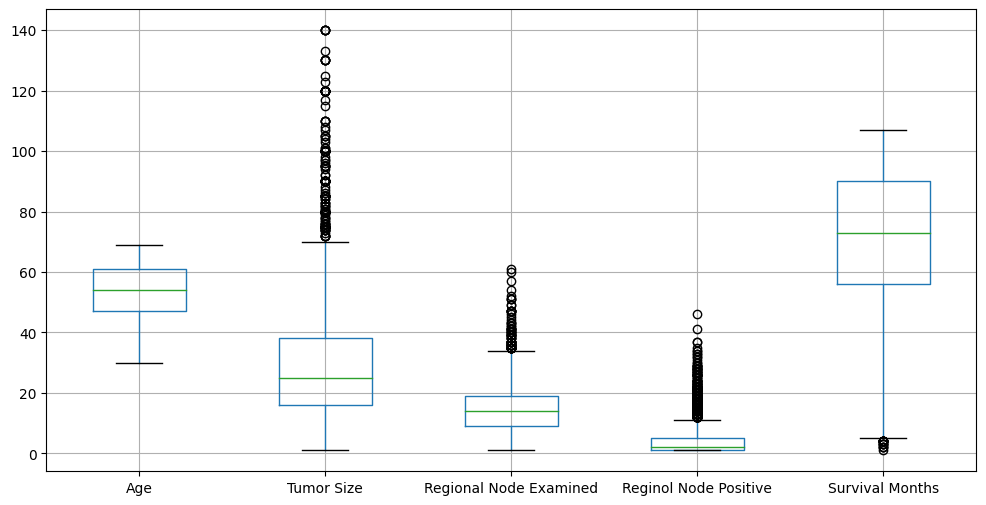

In [3]:
# First the box plots
plt.figure(figsize=(12, 6))
df_seer_data.boxplot(column=['Age', 'Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months'])

plt.show()

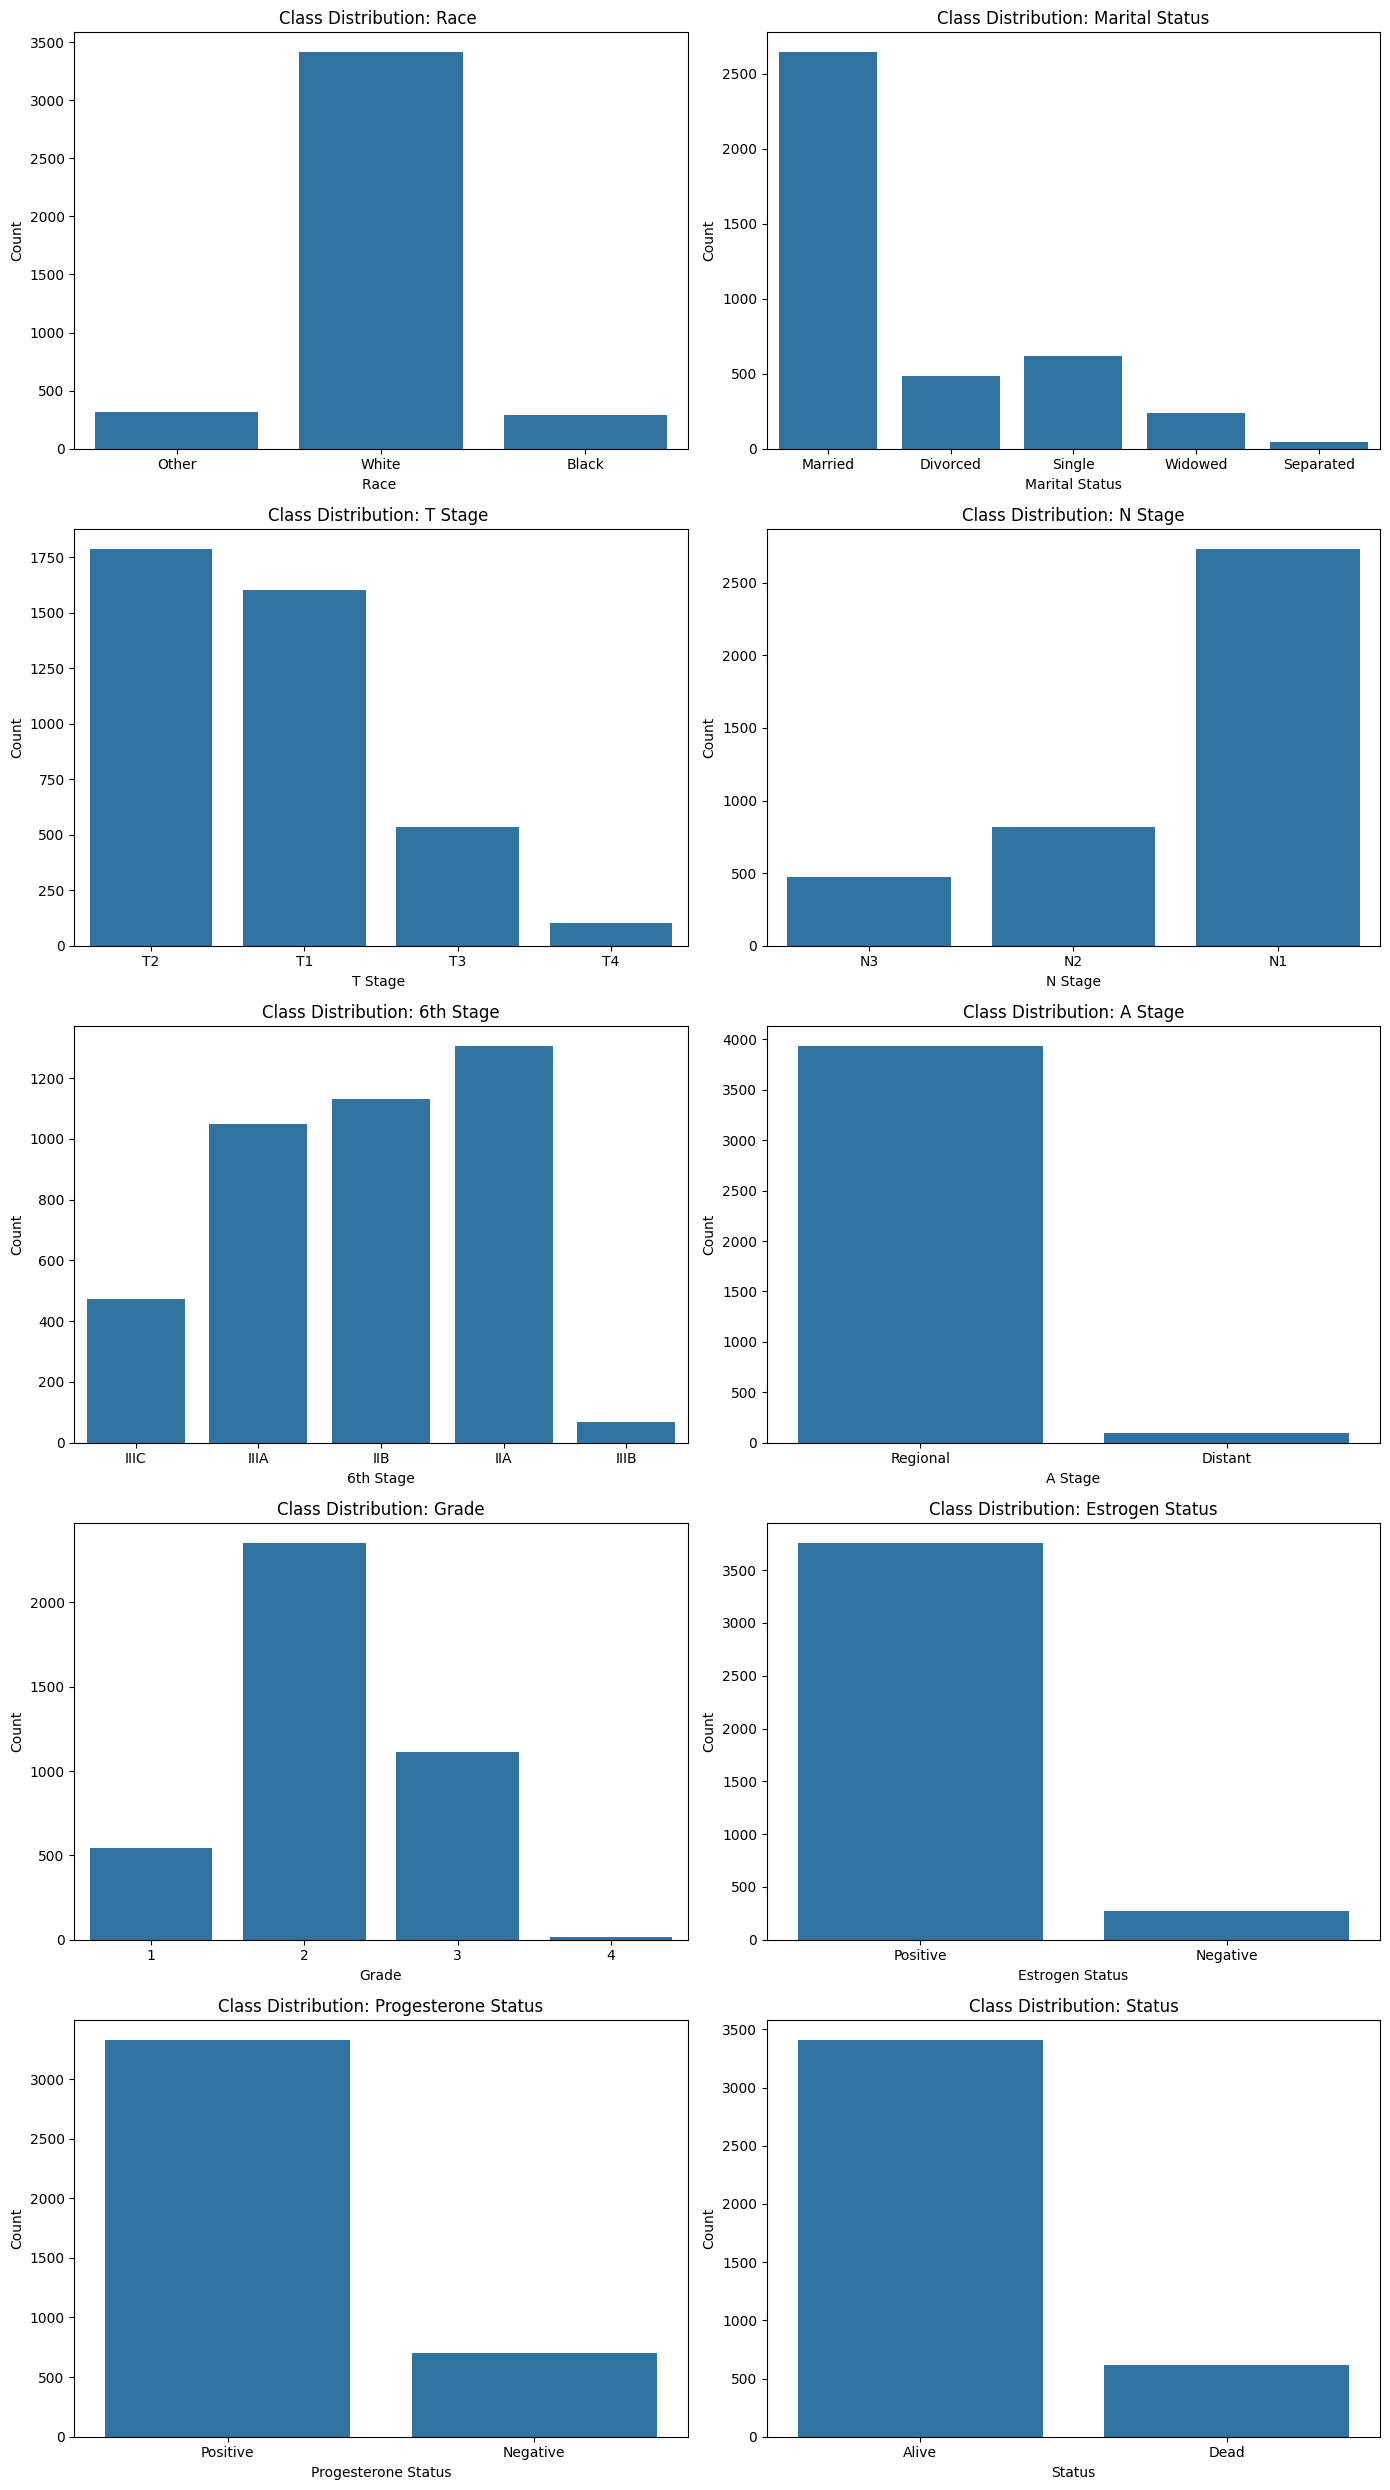

In [4]:
def countplot(df, column, ax):
    """Modified countplot to plot on a specific axis."""
    sns.countplot(x=column, data=df, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Class Distribution: {column}')

# Graph the balance of Status
col_4_plot = ['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 
              'A Stage', 'Grade', 'Estrogen Status', 'Progesterone Status', 'Status']

# Set up the figure to have multiple subplots (2 per row)
n_cols = 2
n_rows = (len(col_4_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))

# Flatten axes array to easily iterate
axes = axes.flatten()

# Plot each countplot in a subplot
for i, item in enumerate(col_4_plot):
    countplot(df_seer_data, item, axes[i])

# Remove any empty subplots if number of columns isn't even
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [5]:
# Use Onehot for Race/Marital Status, becuase ordinal does not make sense ( not order to feature)
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform Marital Status column
encoded = encoder.fit_transform(df_seer_data[['Race ','Marital Status']])

# Convert result to DataFrame and concatenate with original
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Race ','Marital Status']))
df_seer_data = pd.concat([df_seer_data, encoded_df], axis=1).drop(columns=['Race ','Marital Status'])

In [6]:
# Label encode the target column
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Coluums to encode:
e_cols = ['T Stage ', 'N Stage', '6th Stage', 'A Stage', 'Estrogen Status', 'Progesterone Status','Status']
for col in e_cols:
    label_encoder = LabelEncoder()
    df_seer_data[col] = label_encoder.fit_transform(df_seer_data[col])
    label_encoders[col] = label_encoder
df_seer_data.head(10)

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,...,Survival Months,Status,Race _Black,Race _Other,Race _White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,43,1,2,4,2,1,40,1,1,19,...,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,47,1,1,2,2,1,45,1,1,25,...,2,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,67,1,0,1,3,1,25,1,1,4,...,2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,46,0,0,0,2,1,19,1,1,26,...,2,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,63,1,1,2,2,1,35,1,1,21,...,3,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,49,1,2,4,2,1,32,1,1,20,...,3,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,64,1,0,1,2,1,22,1,1,1,...,3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,55,0,0,0,2,1,15,1,1,9,...,3,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,59,2,0,2,2,1,70,1,1,9,...,4,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,67,2,1,2,3,1,55,1,1,9,...,4,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Create a pickle to store all the data
## Let's save df_seer_data as a pickle
df_seer_data.to_pickle("df_seer_all_data.pck",protocol=4)

<p><font size="4"><i>
Let's extract all the data points with Status = 1.


In [8]:
count_dead = df_seer_data['Status'].value_counts()[1]
print("Number of dead in Status:", count_dead)

Number of dead in Status: 616


In [9]:
df_seer_data_dead = df_seer_data[df_seer_data['Status'] == 1]
df_seer_data_dead.drop('Status', axis=1, inplace = True)
df_seer_data_dead.head()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Race _Black,Race _Other,Race _White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
2,67,1,0,1,3,1,25,1,1,4,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,46,0,0,0,2,1,19,1,1,26,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,63,1,1,2,2,1,35,1,1,21,5,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,64,1,0,1,2,1,22,1,1,1,1,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,59,2,0,2,2,1,70,1,1,9,1,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Create a pickle to store Status = '1;
## Let's save df_seer_data_dead as a pickle
df_seer_data_dead.to_pickle("df_seer_data_dead.pck",protocol=4)

In [11]:
# Calculate the average of 'Survival Months' for status = '1'
print("Average of Survival Months:", df_seer_data_dead['Survival Months'].mean())
print("Max survival months:",df_seer_data_dead['Survival Months'].max())
print("Min survival months:",df_seer_data_dead['Survival Months'].min())

Average of Survival Months: 45.61038961038961
Max survival months: 102
Min survival months: 2


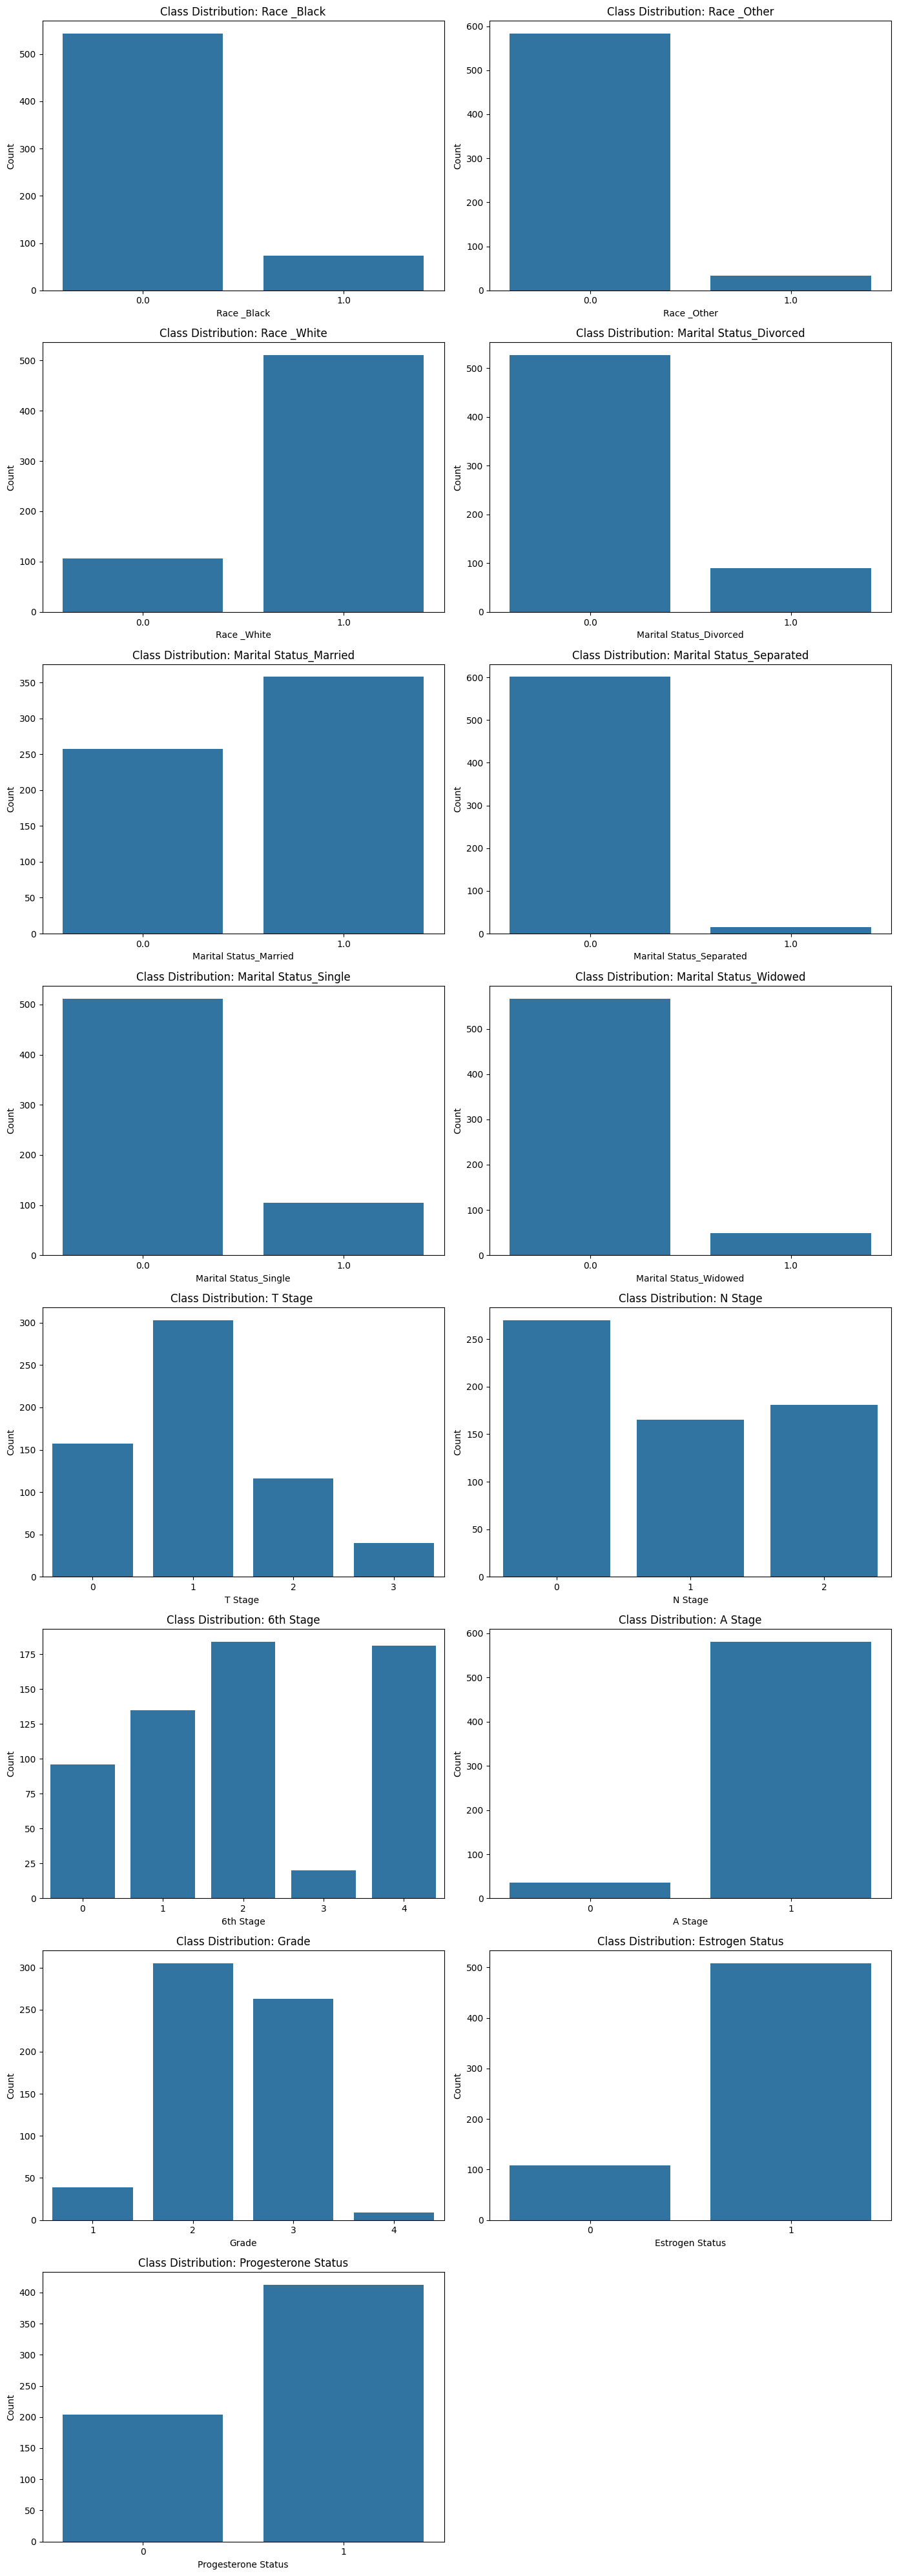

In [12]:
# Graph the balance of Status
col_4_plot = ['Race _Black', 'Race _Other', 'Race _White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated', 'Marital Status_Single', 'Marital Status_Widowed','T Stage ', 'N Stage', '6th Stage', 
              'A Stage', 'Grade', 'Estrogen Status', 'Progesterone Status']

# Set up the figure to have multiple subplots (2 per row)
n_cols = 2
n_rows = (len(col_4_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))

# Flatten axes array to easily iterate
axes = axes.flatten()

# Plot each countplot in a subplot
for i, item in enumerate(col_4_plot):
    countplot(df_seer_data_dead, item, axes[i])

# Remove any empty subplots if number of columns isn't even
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

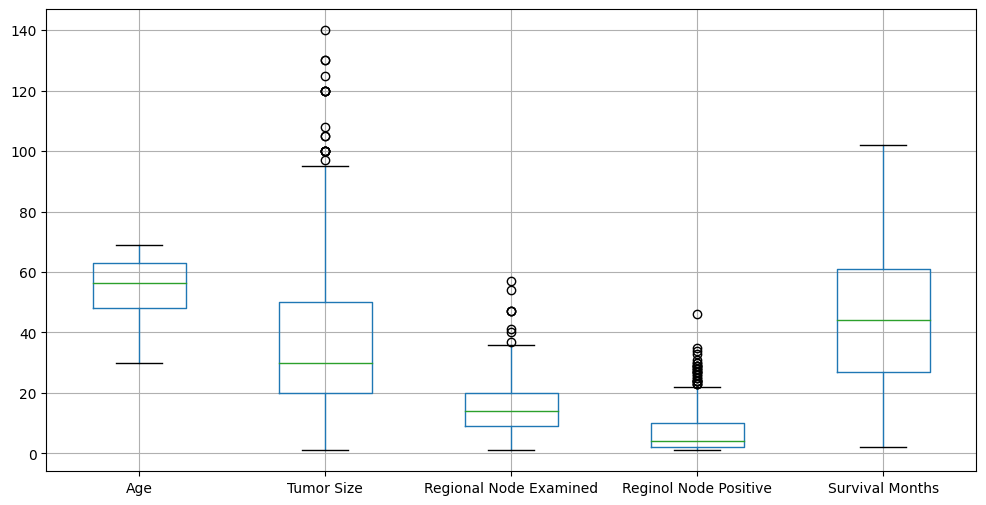

In [13]:
# Box plots 
plt.figure(figsize=(12, 6))
df_seer_data_dead.boxplot(column=['Age', 'Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months'])

plt.show()

(array([25., 19., 32., 29., 46., 43., 41., 47., 47., 48., 49., 40., 28.,
        21., 18., 25., 19., 15., 13., 11.]),
 array([  2.,   7.,  12.,  17.,  22.,  27.,  32.,  37.,  42.,  47.,  52.,
         57.,  62.,  67.,  72.,  77.,  82.,  87.,  92.,  97., 102.]),
 <BarContainer object of 20 artists>)

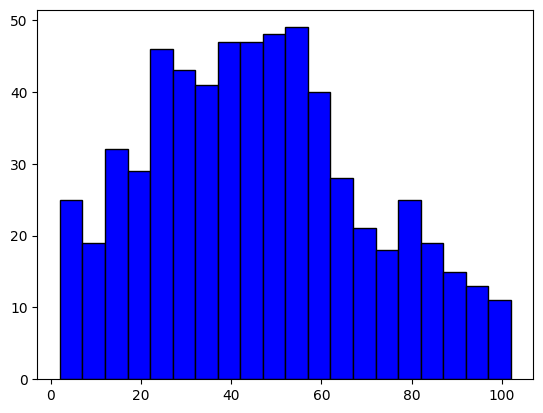

In [14]:
plt.hist(df_seer_data_dead['Survival Months'], bins=20, color='blue', edgecolor='black')

<p><font size="4"><i>
Looks like a normal distribution with a slight right skew.

A transformation will be needed to use this data for a regression problem. Log or square root transformations are candidates.


<p><font size="4"><i>
Before doing that, let's standardize the data.

First split the data into test & train:

In [15]:
column_names = df_seer_data_dead.columns.tolist()
label_column = ['Survival Months']
no_labels = [x for x in column_names if x not in label_column]
df_X = df_seer_data_dead[no_labels]
df_y = df_seer_data_dead['Survival Months']

# Use sklearn's module for an 80/20 split.
df_Xtr, df_Xts, df_ytr, df_yts = train_test_split(df_X, df_y, train_size=0.80, random_state=42)
print('Training pts:',len(df_Xtr),'Test pts:',len(df_Xts))

Training pts: 492 Test pts: 124


<p><font size="4"><i>

* Separate the numeric features from the categorical features for both test & train
* Calculate the scaler for only the numeric columns for train
* Apply the scaler to both train & test
* Concatenate with the categorical features

In [17]:
# Separate the numeric and categorical features
numeric_features = ['Age', 'Tumor Size','Regional Node Examined','Reginol Node Positive']


df_Xtr_numeric = df_Xtr[numeric_features]
df_Xts_numeric = df_Xts[numeric_features]

df_Xtr_categorical = df_Xtr.drop(numeric_features, axis=1)
df_Xts_categorical = df_Xts.drop(numeric_features, axis=1)

category_features = df_Xts_categorical.columns.to_list()

#Convert the numeric features back to a numpy array
Xtr_numeric = df_Xtr_numeric.to_numpy()
Xts_numeric = df_Xts_numeric.to_numpy()

#Calculate the scaler
scaler = StandardScaler()
scaler.fit(Xtr_numeric)

# Standardize the numeric features
Xtr_standardized = scaler.fit_transform(Xtr_numeric)
Xts_standardized = scaler.transform(Xts_numeric)    # Apply the standardization from the training data to the test data. 

# Convert back to a dataframe for ease of use:
df_Xtr_standard = pd.DataFrame(Xtr_standardized, columns=numeric_features)
df_Xts_standard = pd.DataFrame(Xts_standardized, columns=numeric_features)

#Concatenate features :
df_Xtr_fs = pd.concat([df_Xtr_standard.reset_index(drop=True), df_Xtr_categorical.reset_index(drop=True)], axis=1)
df_Xts_fs = pd.concat([df_Xts_standard.reset_index(drop=True), df_Xts_categorical.reset_index(drop=True)], axis=1)

num_nulls_Xtr = df_Xtr_fs.isnull().sum().sum()
print("Total null values in df_Xtr_fs:", num_nulls_Xtr)

num_nulls_Xts = df_Xts_fs.isnull().sum().sum()
print("Total null values in df_Xts_fs:", num_nulls_Xts)

Total null values in df_Xtr_fs: 0
Total null values in df_Xts_fs: 0


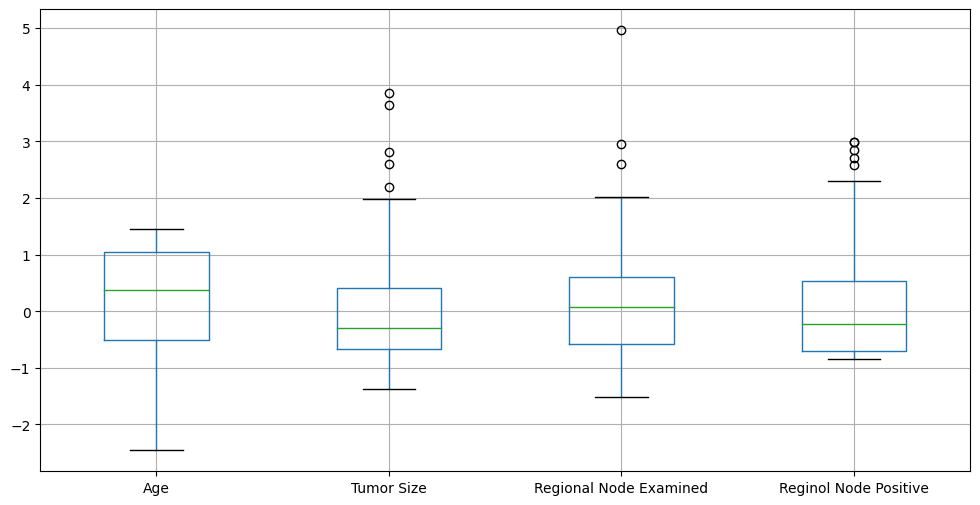

In [18]:
# Let's remake the box plots to check the result of the standardization
plt.figure(figsize=(12, 6))
df_Xts_standard.boxplot(column=['Age', 'Tumor Size','Regional Node Examined','Reginol Node Positive'])

plt.show()

In [19]:
# Create pickles to store and test and training data
df_Xtr_fs.to_pickle("df_Xtr_fs.pck",protocol=4)
df_Xts_fs.to_pickle("df_Xts_fs.pck",protocol=4)
df_ytr.to_pickle("df_ytr.pck",protocol=4)
df_yts.to_pickle("df_yts.pck",protocol=4)

<p><font size="4"><i>
Lastly, let's experiment with label transformations.

(array([ 2.,  0.,  1.,  7.,  4.,  7.,  4.,  4.,  8., 17., 10., 18., 34.,
        39., 42., 58., 79., 68., 57., 33.]),
 array([0.69314718, 0.88973846, 1.08632974, 1.28292103, 1.47951231,
        1.67610359, 1.87269487, 2.06928615, 2.26587743, 2.46246872,
        2.65906   , 2.85565128, 3.05224256, 3.24883384, 3.44542512,
        3.64201641, 3.83860769, 4.03519897, 4.23179025, 4.42838153,
        4.62497281]),
 <BarContainer object of 20 artists>)

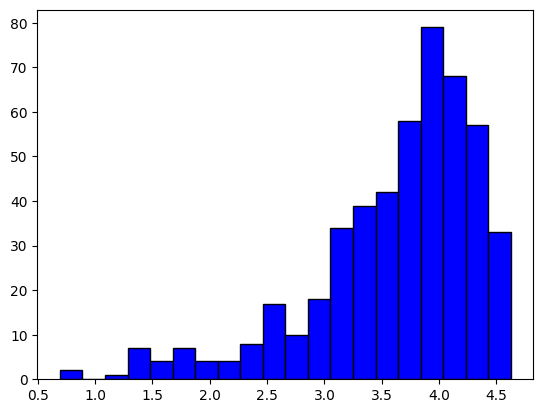

In [20]:
# Log Transformation:
df_ytr_lf = pd.Series(np.log(df_ytr))
plt.hist(df_ytr_lf, bins=20, color='blue', edgecolor='black')

(array([ 3., 11., 11.,  4., 11., 22.,  9., 28., 34., 31., 33., 37., 45.,
        55., 36., 35., 24., 31., 18., 14.]),
 array([ 1.41421356,  1.84847813,  2.2827427 ,  2.71700727,  3.15127184,
         3.58553641,  4.01980098,  4.45406554,  4.88833011,  5.32259468,
         5.75685925,  6.19112382,  6.62538839,  7.05965296,  7.49391753,
         7.92818209,  8.36244666,  8.79671123,  9.2309758 ,  9.66524037,
        10.09950494]),
 <BarContainer object of 20 artists>)

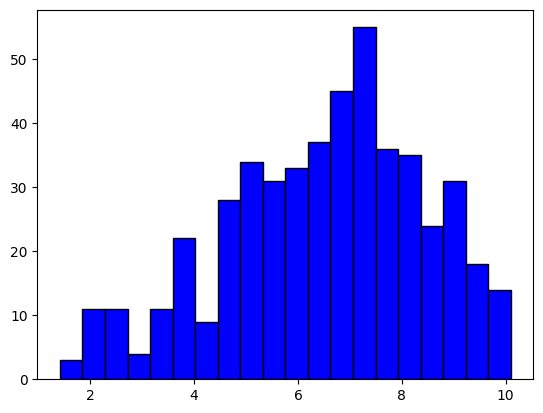

In [21]:
# Sq Root Transformation:
df_ytr_sqr = pd.Series(np.sqrt(df_ytr))
plt.hist(df_ytr_sqr, bins=20, color='blue', edgecolor='black')

<p><font size="4"><i>
The sqr root transformation looks a little better than the log. Let's write 2 pickles so both non transformed and sq root tranformed can be tried.

In [22]:
# Create pickles to store and test and training data
df_yts_sqr = pd.Series(np.sqrt(df_yts))
df_ytr_sqr.to_pickle("df_ytr_sqr.pck",protocol=4)
df_yts_sqr.to_pickle("df_yts_sqr.pck",protocol=4)

In [93]:
df_Xtr_fs.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,T Stage,N Stage,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Race _Black,Race _Other,Race _White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
401,-1.632527,1.364056,-0.333814,-0.564378,2,0,2,3,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3463,1.042074,0.039295,-1.393402,-0.564378,1,0,1,2,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
327,-0.398096,0.122093,0.019383,-0.564378,1,0,1,3,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
220,-1.941135,-0.374692,0.725775,-0.837679,1,0,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1291,-0.192357,-0.457490,0.961240,-0.701028,1,0,1,3,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<p><font size="4"><i>
Let's look for some correlation by ploting some of the features vs the targets.

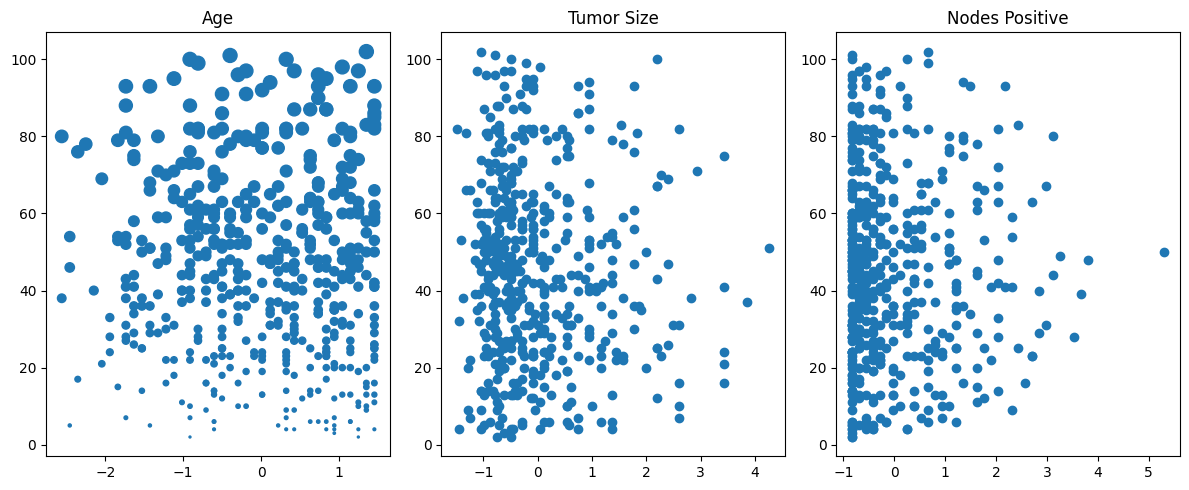

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Plot the first subplot
axs[0].scatter(Xtr_standardized[:,0],ytr, ytr)
axs[0].set_title('Age')

# Plot the second subplot
axs[1].scatter(Xtr_standardized[:,1],ytr)
axs[1].set_title('Tumor Size')

# Plot the second subplot
axs[2].scatter(Xtr_standardized[:,3],ytr)
axs[2].set_title('Nodes Positive')

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

<p><font size="4"><i>
Looks to be no correlation.

The other features are categorical, let's looks at some box plots for Estrogen Status, Progesterone Status & 6th Stage

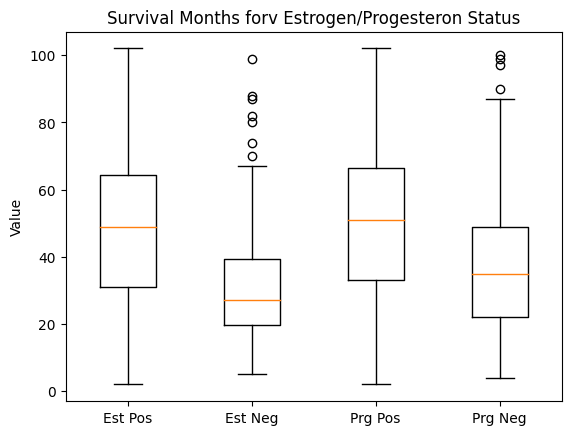

In [89]:
df_est_pos = df_ytr.loc[df_Xtr_fs['Estrogen Status'] == 1]
df_est_neg = df_ytr.loc[df_Xtr_fs['Estrogen Status'] == 0]

df_prg_pos = df_ytr.loc[df_Xtr_fs['Progesterone Status'] == 1]
df_prg_neg = df_ytr.loc[df_Xtr_fs['Progesterone Status'] == 0]

# Create a list of data to plot
data_to_plot = [df_est_pos, df_est_neg, df_prg_pos, df_prg_neg]

# Create the box plot
plt.boxplot(data_to_plot, labels=['Est Pos', 'Est Neg', 'Prg Pos','Prg Neg'])

plt.ylabel('Value')
plt.title('Survival Months forv Estrogen/Progesteron Status')
plt.show()


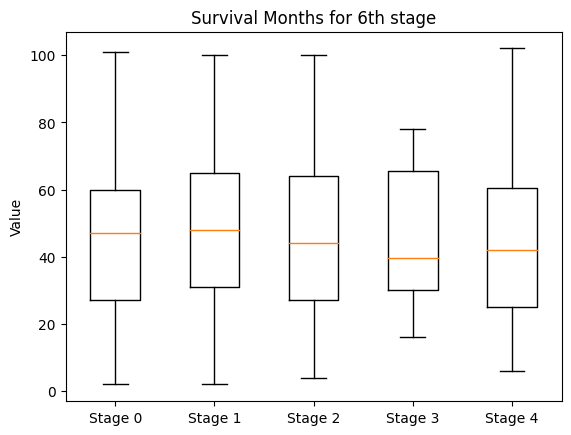

In [88]:
df_6th_0 = df_ytr.loc[df_Xtr_fs['6th Stage'] == 0]
df_6th_1 = df_ytr.loc[df_Xtr_fs['6th Stage'] == 1]
df_6th_2 = df_ytr.loc[df_Xtr_fs['6th Stage'] == 2]
df_6th_3 = df_ytr.loc[df_Xtr_fs['6th Stage'] == 3]
df_6th_4 = df_ytr.loc[df_Xtr_fs['6th Stage'] == 4]

# Create a list of data to plot
data_to_plot = [df_6th_0, df_6th_1, df_6th_2, df_6th_3, df_6th_4]

# Create the box plot
plt.boxplot(data_to_plot, labels=['Stage 0', 'Stage 1', 'Stage 2','Stage 3', 'Stage 4'])

plt.ylabel('Value')
plt.title('Survival Months for 6th stage')
plt.show()

In [90]:
# As a sanity check, let's print out the max/min for each stage:
print("Max survival months df_6th_0:",df_6th_0.max())
print("Min survival months df_6th_0:",df_6th_0.min())

print("Max survival months df_6th_1:",df_6th_1.max())
print("Min survival months df_6th_1:",df_6th_1.min())

print("Max survival months df_6th_2:",df_6th_2.max())
print("Min survival months df_6th_2:",df_6th_2.min())

print("Max survival months df_6th_3:",df_6th_3.max())
print("Min survival months df_6th_3:",df_6th_3.min())

print("Max survival months df_6th_4:",df_6th_4.max())
print("Min survival months df_6th_4:",df_6th_4.min())


Max survival months df_6th_0: 101
Min survival months df_6th_0: 2
Max survival months df_6th_1: 100
Min survival months df_6th_1: 2
Max survival months df_6th_2: 100
Min survival months df_6th_2: 4
Max survival months df_6th_3: 78
Min survival months df_6th_3: 16
Max survival months df_6th_4: 102
Min survival months df_6th_4: 6


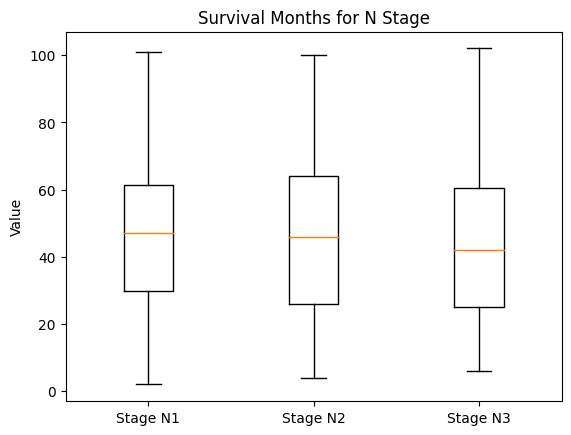

In [91]:
df_N_0 = df_ytr.loc[df_Xtr_fs['N Stage'] == 0]
df_N_1 = df_ytr.loc[df_Xtr_fs['N Stage'] == 1]
df_N_2 = df_ytr.loc[df_Xtr_fs['N Stage'] == 2]


# Create a list of data to plot
data_to_plot = [df_N_0, df_N_1, df_N_2]

# Create the box plot
plt.boxplot(data_to_plot, labels=['Stage N1', 'Stage N2', 'Stage N3'])

plt.ylabel('Value')
plt.title('Survival Months for N Stage')
plt.show()

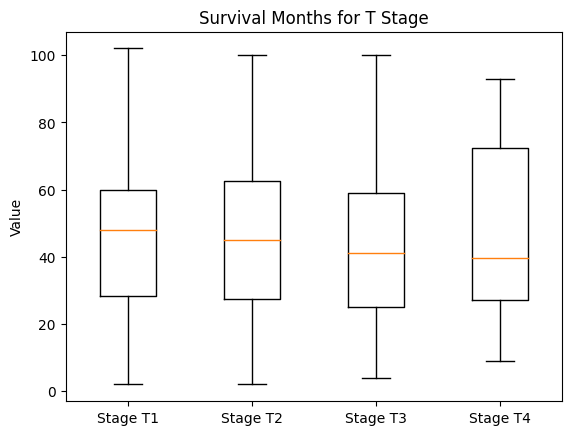

In [94]:
df_T_0 = df_ytr.loc[df_Xtr_fs['T Stage '] == 0]
df_T_1 = df_ytr.loc[df_Xtr_fs['T Stage '] == 1]
df_T_2 = df_ytr.loc[df_Xtr_fs['T Stage '] == 2]
df_T_3 = df_ytr.loc[df_Xtr_fs['T Stage '] == 3]


# Create a list of data to plot
data_to_plot = [df_T_0, df_T_1, df_T_2, df_T_3]

# Create the box plot
plt.boxplot(data_to_plot, labels=['Stage T1', 'Stage T2', 'Stage T3', 'Stage T4'])

plt.ylabel('Value')
plt.title('Survival Months for T Stage')
plt.show()

<p><font size="4"><i>
In summary, this notebook has written 8 dataframes:

* df_seer_all_data.pck : All the data, no standardization, no label transformation
* df_seer_data_dead.pck : Status = '1' (dead), no standardization, no label transformation
* df_Xtr_fs.pck : training data with features standardized
* df_Xts_fs.pck : test data with feature standardized
* df_ytr.pck : training labels (targets), no label transformation
* df_yts.pck : test labels (targets), no label transformation
* df_ytr_sqr.pck : training labels with sqr transformation applied
* df_yts_sqr.pck : test labels with sqr transformation applied

These are pickels that can be read with pd.read_pickle()

<p><font size="4"><i>
There is no clear correlation between the target "Survival Months" and any particular feature.